<a href="https://colab.research.google.com/github/Ashmie11/MLTSA25_AThapa/blob/main/In%20class/MLTSA25_lab%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
url = "https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv"
grbAG = pd.read_csv("")
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


In [ ]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv")


In [ ]:
grbAG.columns

Index(['filter', 'time', 'mag', 'magerr', 'upperlimit'], dtype='object')

In [ ]:
grbAG[['time', 'mag', 'magerr', 'upperlimit']].corr()

,time,mag,magerr,upperlimit
time,1.000000,0.846971,0.517663,0.506833
mag,0.846971,1.000000,0.602576,NaN
magerr,0.517663,0.602576,1.000000,0.999288
upperlimit,0.506833,NaN,0.999288,1.000000


<Axes: xlabel='time', ylabel='mag'>

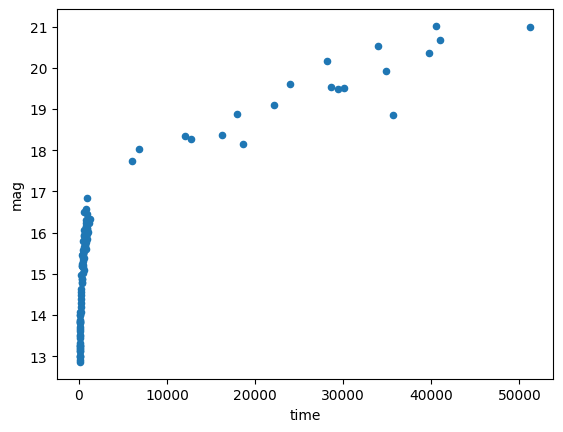

In [ ]:
grbAG.plot(x="time", y="mag", kind= "scatter")

In [ ]:
import numpy as np
x = np.arange(0,100,0.1)
y = x.copy()

In [ ]:
import numpy as np

grbAG['logtime'] = np.log10(grbAG.loc[:, "time"])

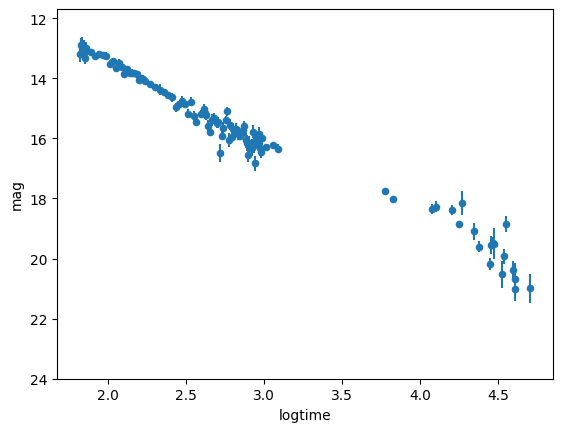

In [ ]:
ax = grbAG.plot(x='logtime', y='mag', kind='scatter', yerr= "magerr")
ax.set_ylim(24,11.7);

In [ ]:


from sklearn.linear_model import LinearRegression


model = LinearRegression()

X = grbAG[['logtime']]
y = grbAG['mag']

model.fit(X, y)


y_pred = model.predict(X)

# Plot the line of best fit
import matplotlib.pyplot as plt
ax = grbAG.plot(x='logtime', y='mag', kind='scatter', yerr="magerr")
ax.plot(X, y_pred, color='red') # Plot the regression line
ax.set_ylim(24, 11.7);
plt.show()


In [ ]:
np.c_?

In [ ]:
X = grbAG["logtime"].values
X = np.c_[np.ones_like(x),x]

In [ ]:
grbAG["logtime"] = ...
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,Ellipsis
1,V,67,12.90,0.23,0,Ellipsis
2,V,68,12.86,0.23,0,Ellipsis
3,V,69,13.01,0.23,0,Ellipsis
4,V,70,12.97,0.23,0,Ellipsis


In [ ]:
pl.errorbar?

Object `pl.errorbar` not found.


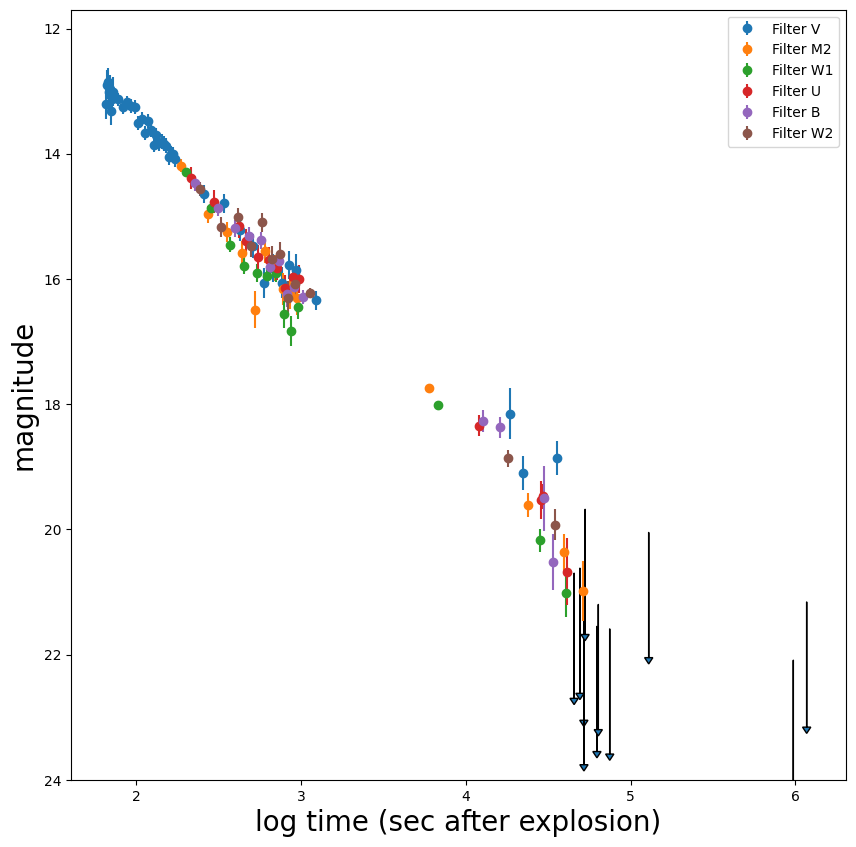

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in grbAG["filter"].unique():
    filter_data = grbAG[grbAG["filter"] == f]
    pl.errorbar(filter_data["logtime"], filter_data["mag"], yerr=filter_data["magerr"], fmt='o', label=f'Filter {f}')

for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, grbAG.loc[i].magerr, 0, 2, head_width=0.05, head_length=0.1, ec='k')

pl.ylim(24, 11.7)
pl.legend()
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time (sec after explosion)", fontsize=20)
pl.show()


In [ ]:

grbAG['logtime'] = np.log10(grbAG['time']) # Create the logtime column if it does not exist
x = grbAG.loc[:, ["logtime"]].values
x

In [ ]:
y = grbAG["mag"].values
y

array([13.21      , 12.9       , 12.86      , 13.01      , 12.97      ,
       13.31      , 13.13      , 13.01      , 13.13      , 13.26      ,
       13.18      , 13.24      , 13.25      , 13.51      , 13.44      ,
       13.67      , 13.48      , 13.62      , 13.86      , 13.7       ,
       13.83      , 13.81      , 13.84      , 13.87      , 14.06      ,
       14.        , 14.01      , 14.08      , 14.18903433, 14.29714678,
       14.38453778, 14.47292871, 14.56755795, 14.64      , 14.96903433,
       14.86714678, 14.76453778, 14.87292871, 15.17755795, 14.79      ,
       15.24903433, 15.45714678, 15.19292871, 15.00755795, 15.15453778,
       15.22      , 15.58903433, 15.78714678, 15.39453778, 15.31292871,
       15.47755795, 15.47      , 16.48903433, 15.90714678, 15.65453778,
       15.38292871, 15.09755795, 16.06      , 15.54903433, 15.94714678,
       15.69453778, 15.81292871, 15.67755795, 15.83      , 15.82903433,
       15.90714678, 15.82453778, 15.71292871, 15.59755795, 16.06

In [ ]:
y.shape

(119,)

In [ ]:
grbAG.isna().sum()

,0
filter,0
time,0
mag,11
magerr,0
upperlimit,0


In [ ]:
x.shape

(119, 1)

In [ ]:
grbAG_nonan = grbAG.dropna()
#grbAG.dropna(inplace=True)

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.210000,0.24,0,1.819544
1,V,67,12.900000,0.23,0,1.826075
2,V,68,12.860000,0.23,0,1.832509
3,V,69,13.010000,0.23,0,1.838849
4,V,70,12.970000,0.23,0,1.845098
...,...,...,...,...,...,...
103,V,35638,18.860000,0.27,0,4.551913
104,M2,39683,20.369034,0.30,0,4.598604
105,W1,40585,21.017147,0.39,0,4.608366
106,U,41040,20.674538,0.54,0,4.613207


In [ ]:
grbAG_nonan = grbAG.dropna()
x = grbAG_nonan.loc[:, "logtime"].values # Use grbAG_nonan instead of grbAG_nonanloc
y = grbAG_nonan.loc[:, "mag"].values    # Use grbAG_nonan instead of grbAG_nonanloc
x.shape

(108,)

In [ ]:
np.ones(len(grbAG_nonan))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
X = np.c_[
    np.ones(
        (len(grbAG_nonan),
        1)),x]
X.shape

(108, 2)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(x, y)
lr.coef_


array([2.51199984])

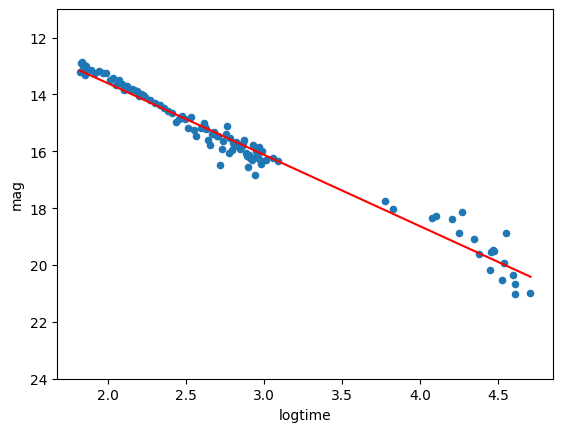

In [64]:
from matplotlib import pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = grbAG_nonan[["logtime"]]
y = grbAG_nonan["mag"]

lr = LinearRegression()
lr.fit(X, y)

ax = grbAG_nonan.plot(x="logtime", y="mag", kind="scatter")
ax.set_ylim(24, 11)


x_range = np.linspace(grbAG_nonan["logtime"].min(), grbAG_nonan["logtime"].max(), 100).reshape(-1, 1)
x_range_df = pd.DataFrame(x_range, columns=["logtime"])


ax.plot(x_range_df["logtime"], lr.predict(x_range_df), color='red')

plt.show()

